# Installing Tensorflow-GPU

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 16.7MB/s 
     |████████████████████████████████| 4.3MB 62.0MB/s 


# Importing neccessary Libraries.

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dropout,BatchNormalization,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Gathering Data by cloning the Github repository

In [5]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


# Reading data and displaying the top Rows

In [0]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')

In [7]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
data.shape

(76020, 371)

In [9]:
X = data.drop(labels=['ID','TARGET'],axis=1)
y = data['TARGET']

print(X.shape)
print('\n')
print(y.shape)

(76020, 369)


(76020,)


# Splitting the Data

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# Remove Constants and Quasi Constants features

In [11]:
vt = VarianceThreshold(0.01)
X_train = vt.fit_transform(X_train)
X_test = vt.transform(X_test)

X_train.shape, X_test.shape

((60816, 269), (15204, 269))

# Removing Duplicated features

In [0]:
X_train_T = pd.DataFrame(X_train.T)
X_test_T = pd.DataFrame(X_test.T)

In [13]:
X_train_T.shape

(269, 60816)

In [14]:
X_train_T.duplicated().sum()

18

In [0]:
dupFeat = X_train_T.duplicated()
feat = [not index for index in dupFeat]
X_train = X_train_T[feat].T
X_test = X_test_T[feat].T

In [16]:
X_train.shape, X_test.shape

((60816, 251), (15204, 251))

# Achieiving Uniform distribution of the features

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the data to 3D as CNN takes 3D input

In [0]:
X_train = X_train.reshape(60816,251,1)
X_test = X_test.reshape(15204,251,1)

# Converting y_train and y_test series into numpy array

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Building CNN

In [0]:
model = Sequential()
model.add(Conv1D(32,kernel_size=3,activation='relu',input_shape=(251,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 249, 32)           128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 249, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 124, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_4 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 61, 64)           

In [0]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60816/60816 [==============================] - 24s 396us/sample - loss: 0.2200 - accuracy: 0.9534 - val_loss: 0.1789 - val_accuracy: 0.9597
Epoch 2/10
60816/60816 [==============================] - 16s 258us/sample - loss: 0.1812 - accuracy: 0.9591 - val_loss: 0.1763 - val_accuracy: 0.9600
Epoch 3/10
60816/60816 [==============================] - 16s 269us/sample - loss: 0.1711 - accuracy: 0.9600 - val_loss: 0.1669 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 16s 257us/sample - loss: 0.1656 - accuracy: 0.9604 - val_loss: 0.1638 - val_accuracy: 0.9599
Epoch 5/10
60816/60816 [==============================] - 15s 253us/sample - loss: 0.1635 - accuracy: 0.9604 - val_loss: 0.1661 - val_accuracy: 0.9602
Epoch 6/10
60816/60816 [==============================] - 15s 251us/sample - loss: 0.1613 - accuracy:

In [0]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

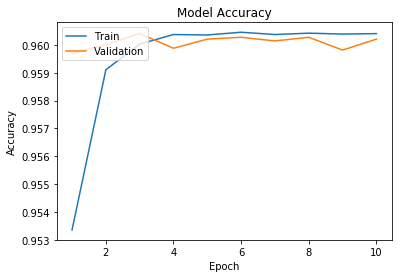

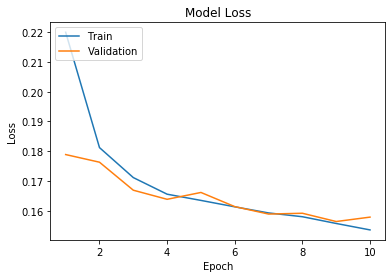

In [30]:
plotLearningCurve(history,10)